# **Homework 3**

Due: **October 8th, 5pm** (late submission until October 11th, 5pm -- no submission possible afterwards)

Written assignment: 10 points

Coding assignment: 25 points

Project report: 15 points

### Name: Qiuli Lai

### Link to the github repo: https://github.com/098pipi/data2060_hw3.git

## Written assignment

### **Gradient Descent (10 points)**

Consider using gradient descent to find the minimum of $f$, where,
- $f$ is a convex function over the closed interval \[-*b*,*b*\], *b* > 0
- $f'$ is the derivative of $f$
- $\alpha$ is some positive number which will represent a learning rate parameter

The steps of gradient descent are as follows:

- Start at $x_{0} = 0$
- At each step, set $x_{t+1} = x_{t} - \alpha f'(x_{t})$
- If $x_{t+1}$ falls below  -*b*, set it to -*b*, and if it goes above *b*, set it to *b*.

We say that an optimization algorithm (such as gradient descent)
*$\epsilon$-converges* if, at some point, $x_{t}$ stays within  $\epsilon$ of
the true minimum. Formally, we have *$\epsilon$-convergence* at time $t$ if

$\quad \quad |x_{t'}-x_{\min}| \le \epsilon, \quad \text{where } x_{\min}=\underset{x \in [-b,b]}{argmin} f(x)$ for all $t' \geq t$.

### **Question 1**
For $\alpha$ = 0.1, *b* = 1, and $\epsilon$ = 0.001, find a convex function $f$ so that running gradient descent does not  $\epsilon$-converge.
Specifically, make it so that *x*<sub>0</sub> = 0,
$x_1$ = *b*,  $x_2$ =  - *b*,  $x_3$ = *b*,  $x_4$ =  - *b*, etc. 

**Solution:**
Parameters:  
$\alpha = 0.1,\; b = 1,\; \epsilon = 0.001$  

**Iteration steps:**  
$$
x_0 = 0 \\
x_1 = x_0 - 0.1 f'(x_0) \\
1 = 0 - 0.1 f'(0) \\
f'(0) = -10
$$

$$
-1 = 1 - 0.1 f'(1) \\
f'(1) = 20
$$

$$
1 = -1 - 0.1 f'(-1) \\
f'(-1) = -20
$$

**Form of derivative:**  
$$
f'(x) = ax^2 + bx + c
$$

Using conditions:  
$$
f'(0) = c = -10 \\
f'(1) = a + b - 10 = 20 \\
f'(-1) = a - b - 10 = -20
$$

Solve system:  
$$
a = 10,\; b = 20
$$

So,  
$$
f'(x) = 10x^2 + 20x - 10 + K
$$
 since K is irrelevant for gradient descent, we set K = 0

Integrating:  
$$
f(x) = \tfrac{10}{3}x^3 + 10x^2 - 10x
$$

**Convexity on [-1,1]**

f''(x) = 20x + 20 on [-1,1], f''(x) in a monotonically increasing function, min{f''(x)} = f''(-1) = 0, hence f''(x) >= 0 for any x in [-1, 1], f is convex on the closed interval [-1, 1]

**Convergence check:**  
$$
x_{\min} = 0, \quad |x_t - x_{\min}| = 1 > \epsilon = 0.001 \;\;\; \forall \; t > 0
$$

Thus, the method diverges.


### **Question 2**
For *$\alpha$* = 0.1, *b* = 1, and  $\epsilon$ = 0.001, find a convex function $f$
so that gradient descent does *$\epsilon$-converge*, but only after at least
10,000 steps. 

### Solution
For simplicity, consider f a quadratic function
$$f(x) = \tfrac{\mu}{2}x^2, \quad \mu > 0 \\
f'(x) = \mu x. \\
f''(x) = \mu > 0
$$
so f(x) is convex

$$x_{n+1} = x_t - 0.1f'(x_n) = (1 - 0.1\mu)\,x_n.$$

Define the convergence rate 
    $$r := 1 - 0.1 \mu$$

By induction,
$$x_n = r^n x_0$$

Choose that 
$$x_n = \epsilon, x_0 = 1, n = 10^4$$
$$r^n = \frac{\varepsilon}{\lvert x_0 \rvert}.$$

$$r = \left(\frac{\varepsilon}{\lvert x_0 \rvert}\right)^{1/n}, \quad 
\mu = \frac{1-r}{0.1}.$$

$$r = 10^{-3/10000}, \quad \mu \approx 0.00690537.$$

$$f(x) = 0.00345268 \, x^2.$$




## **Coding Assignment (25 points)**

#### Run the evironment test below, make sure you get all green checks. If not, you will lose 2 points for each red or missing sign.

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.11"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.11"):
    print(FAIL, "Python version 3.12.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.10.5", 'numpy': "2.3.2",'sklearn': "1.7.1", 
                'pandas': "2.3.2", 'pytest': "8.4.1", 'torch':"2.7.1"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.13.5

[ OK ] matplotlib version 3.10.5 is installed.
[ OK ] numpy version 2.3.2 is installed.
[ OK ] sklearn version 1.7.1 is installed.
[ OK ] pandas version 2.3.2 is installed.
[ OK ] pytest version 8.4.1 is installed.
[ OK ] torch version 2.7.1 is installed.


### Introduction

In this assignment, you will be using a modified version of the UCI
Census Income data set to predict the education levels of individuals
based on certain attributes collected from the 1994 census database. You
can read more about the dataset here:
[`https://archive.ics.uci.edu/ml/datasets/Census+Income`](https://archive.ics.uci.edu/ml/datasets/Census+Income).  

### Stencil Code

We have provided the following stencil code within this file:

-   `Model` contains the `LogisticRegression` model you will be
    implementing.

-   `Check Model` contains a series of tests to ensure you are coding your 
    model properly.

-   `Main` is the entry point of program which will read in the
    dataset, run the model, and print the results.

You should not modify any code in `Check Model` and `Main`. If you do for debugging
or other purposes, please make sure any additions are commented out in
the final handin. All the functions you need to fill in reside in this notebook,
marked by `TODO`s. You can see a full description of them in the section
below.

### **The Assignment**

In `Model`, there are a few functions you will implement. They are:

-   `LogisticRegression`:

    -   **train()** uses stochastic gradient descent to train the
        weights of the model.

    -   **loss()** calculates the log loss of some dataset divided by
        the number of examples.

    -   **predict()** predicts the labels of data points using the
        trained weights. For each data point, you should apply the
        softmax function to it and return the label with the highest
        assigned probability.

    -   **accuracy()** computes the percentage of the correctly
        predicted labels over a dataset.

*Note*: You are not allowed to use any packages that have already
implemented these models (e.g. scikit-learn). We have also included some
code in `main` for you to test out the different random seeds and
calculate the average accuracy of your model across those random seeds.

### **Logistic Regression**

Logistic Regression, despite its name, is used in classification
problems. It learns sigmoid functions of the inputs
$$h_{\bf w}(x)_j = \phi_{sig}(\langle {\bf w}_j, {\bf x} \rangle)$$
where $h_{\bf w}(x)_j$ is the probability that sample
$\bf x$ is a member of class *j*.  

In multi-class classification, we need to apply the `softmax` function
to normalize the probabilities of each class. The loss function of a
Logistic Regression classifier over *k* classes on a *single* example
(*x*,*y*) is the **log-loss**, sometimes called **cross-entropy loss**:
$$\ell(h_{\bf w}, ({\bf x}, y)) = - \sum_{j = 1}^{k}
\left\{\begin{array}{lr}
    \log( h_{\bf w}({\bf x})_j ), & y = j\\
    0, & \text{otherwise} \\
\end{array}\right\}$$
Therefore, the ERM hypothesis of **w** on a dataset of *m* samples has weights
$$
{\bf w} = \underset{\bf w}{argmin} (-\frac{1}{m}\sum_{i = 1}^m \sum_{j = 1}^{k}
\left\{\begin{array}{lr}
    \log( h_{\bf w}({\bf x}_i)_j), & y_{i} = j\\
    0, & \text{otherwise} \\
\end{array}\right\} )
$$
To learn the ERM hypothesis, we need to perform gradient descent. The
partial derivative of the loss function on a single data point
$$
\frac{\partial l_S(h_{\bf w})}{\partial {\bf w}_{st}} =
\left\{\begin{array}{lr}
    h_{\bf w}({\bf x})_s - 1, & y = s\\
    h_{\bf w}({\bf x})_s, & \text{otherwise} \\
    \end{array}\right\}
    {\bf x}_t
$$
With respect to a single row in the weights matrix, ${\bf w}_s$,
the partial derivative of the loss is
$$
\frac{\partial l_S(h_{\bf w})}{\partial {\bf w}_{s}} =
\left\{\begin{array}{lr}
    h_{\bf w}({\bf x})_s - 1, & y = s\\
    h_{\bf w}({\bf x})_s, & \text{otherwise} \\
    \end{array}\right\}
    {\bf x}
$$
You will need to descend this gradient to update the weights of your
Logistic Regression model.

### **Stochastic Gradient Descent**

You will be using Stochastic Gradient Descent (SGD) to train your
`LogisticRegression` model. Below, we have provided pseudocode for SGD
on a sample *S*:

$\text{initialize parameters } {\bf w}\text{, learning rate } \alpha \text{, and batch size b}$  <br />
$\quad \text{converge = False}$ <br />
$\quad \text{while not converge:}$ <br />
$\quad \quad	\text{epoch + 1}$ <br />
$\quad \quad	\text{shuffle training examples}$ <br />
$\quad \quad	\text{calculate last epoch loss}$ <br />
$\quad \quad	\text{for } i = 0,1,...,\lceil{n_{examples}/b}\rceil-1: \text{-- iterate over batches:}$ <br />
$\quad \quad \quad X_{batch} = X[i \cdot b: (i+1) \cdot b] \text{ -- select the X in the current batch}$ <br />
$\quad \quad \quad {\bf y}_{batch} = {\bf y}[i \cdot b: (i+1) \cdot b] \text{ -- select the labels in the current batch}$ <br />
$\quad \quad \quad \text{initialize } \nabla L_{{\bf w}} \text{ to be a matrix of zeros}$ <br />
$\quad \quad \quad \text{for each pair of training data point } ({\bf x},y)\in (X_{batch}, {\bf y}_{batch}):$ <br />
$\quad \quad \quad \quad \text{for }j = 0,1,..., n_{classes} - 1:$ <br />
$\quad \quad \quad \quad \quad \text{-- calculate the partial derivative of the loss with respect to}$ <br />
$\quad \quad \quad \quad \quad \text{-- a single row in the weights matrix}$ <br />
$\quad \quad \quad \quad \quad \text{if }y = j: \nabla L_{{\bf w}_j} \text{ += } 
(softmax(\langle {\bf w}_j, {\bf x} \rangle) - 1) \cdot {\bf x} $ <br />
$\quad \quad \quad \quad \quad \text{else: }\nabla L_{{\bf w}_j} \text{ += } (softmax(\langle {\bf w}_j, {\bf x} \rangle) ) \cdot {\bf x}$ <br />
$\quad \quad \quad {\bf w} = {\bf w} - \frac{\alpha \nabla L_{\bf w}}{len(X_{batch})} \text{ -- update the weights}$ <br />
$\quad \quad \text{calculate this epoch loss}$ <br />
$\quad \quad \text{if |Loss}(X,{\bf y})_{this-epoch}-Loss(X,{\bf y})_{last-epoch}| <  \text{CONV-THRESHOLD: }$ <br />
$\quad \quad \quad \text{converge = True -- break the loop if loss converged}$


 **Hints**: Consistent with the notation in the lecture, ${\bf w}$ are
initialized as a *k* x *d* matrix, where *k* is the number of classes
and *d* is the number of features (with the bias term). With *n* as the
number of examples, *X* is a *n* x *d* matrix, and ${\bf y}$ is a vector
of length *n*.

### **Tuning Parameters**

Convergence is achieved when the change in loss between iterations is
some small value. Usually, this value will be very close to but not
equal to zero, so it is up to you to tune this threshold value to best
optimize your model's performance. Typically, this number will be some
magnitude of 10<sup>-x</sup>, where you experiment with *x*. Note that
when calculating the loss for checking convergence, you should be
calculating the loss for the entire dataset, not for a single batch
(i.e., at the end of every epoch).  
  
You will also be tuning batch size (and one of the report questions
addresses the impact of batch size on model performance). In order to
reach the accuracy threshold, you will need to tune both parameters. *$\alpha$*
would typically be tuned during the training process, but we are fixing
*$\alpha$* = 0.03 for this assignment. **Please do not change *$\alpha$* in your
code**.  
  
You can tune the batch size and convergence threshold in `Main`.

### **Extra: Numpy Shortcuts**

While optional, there are many numpy shortcuts and functions that can make your code cleaner. We encourage you to look up numpy documentation and learn new functions.

Some useful shortcuts:
* `A @ B` is a shortcut for `np.matmul(A, B)`
* `X.T` is a shortcut for `np.transpose(X)`
* `X.shape` is a shortcut for `np.shape(X)`

## **Model**

In [ ]:
import random
import math
import numpy as np

def softmax(x):
    '''
    Apply softmax to an array
    @params:
        x: the original 1D array
    @return:
        an 1D array with softmax applied elementwise.
    '''
    e = np.exp(x - np.max(x))   # avoid overflow of exp()
    return (e + 1e-6) / (np.sum(e) + 1e-6)  # avoid division by 0/log(0)

class LogisticRegression:
    '''
    Multiclass Logistic Regression that learns weights using 
    stochastic gradient descent.
    '''
    def __init__(self, n_features, n_classes, batch_size, conv_threshold):
        '''
        Initializes a LogisticRegression classifer.
        @attrs:
            n_features: the number of features in the classification problem
            n_classes: the number of classes in the classification problem
            weights: The weights of the Logistic Regression model
            alpha: The learning rate used in stochastic gradient descent
        '''
        self.n_classes = n_classes
        self.n_features = n_features
        self.weights = np.zeros((n_classes, n_features + 1))  # An extra row added for the bias
        self.alpha = 0.03  # DO NOT TUNE THIS PARAMETER
        self.batch_size = batch_size
        self.conv_threshold = conv_threshold

    def train(self, X, Y):
        '''
        Trains the model using stochastic gradient descent
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            num_epochs: integer representing the number of epochs taken to reach convergence
        '''
        # [TODO]
        converge = False
        num_epochs = 0
        # guarantee the diff is huge enough for the first step to diverge
        last_loss = float('inf')    
        while not converge:
            num_epochs += 1
            # shuffle training examples, randomly permuting
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X, Y = X[indices], Y[indices]

            for i in range(math.ceil(len(X)/self.batch_size)):
                X_batch = X[i*self.batch_size : (i+1)*self.batch_size]
                Y_batch = Y[i*self.batch_size : (i+1)*self.batch_size]
                gLw = np.zeros((self.n_classes, self.n_features + 1))

                for x_i, y_i in zip(X_batch, Y_batch):
                    for j in range(self.n_classes):
                        # calculate the partial derivative of the loss w.r.t a single row in W
                        z = self.weights @ x_i.T    # (k, d) * (d,1) --> (k,1)
                        prob = softmax(z.reshape(1,-1).flatten())  # --> (1,k)
                        if y_i == j:
                            gLw[j] += (prob[j] - 1) * x_i
                        else: 
                            gLw[j] += prob[j] * x_i
                # update the weights
                self.weights -= (self.alpha * gLw)/len(X_batch)
            # calculate the epoch loss
            this_loss = self.loss(X, Y)
            if abs(this_loss - last_loss) < self.conv_threshold:
                converge = True
            last_loss = this_loss
        return num_epochs
    

    def loss(self, X, Y):
        '''
        Returns the total log loss on some dataset (X, Y), divided by the number of examples.
        @params:
            X: 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: 1D Numpy array containing the corresponding labels for each example
        @return:
            A float number which is the average loss of the model on the dataset
        '''
        z = X @ self.weights.T # get(n,k) 
        prob = np.array([softmax(z_i) for z_i in z])    # apply row_wise
        total_prob = prob[np.arange(len(Y)), Y]
        total_logLoss = - np.sum(np.log(total_prob))
        return total_logLoss/len(X)
        
    def predict(self, X):
        '''
        Compute predictions based on the learned weigths and examples X
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
        @return:
            A 1D Numpy array with one element for each row in X containing the predicted class.
        '''
        z = X @ self.weights.T  # get(n,k) 
        prob = np.array([softmax(z_i) for z_i in z]) 
        predicted_class = np.argmax(prob, axis=1)
        return predicted_class

    def accuracy(self, X, Y):
        '''
        Outputs the accuracy of the trained model on a given testing dataset X and labels Y.
        @params:
            X: a 2D Numpy array where each row contains an example, padded by 1 column for the bias
            Y: a 1D Numpy array containing the corresponding labels for each example
        @return:
            a float number indicating accuracy (between 0 and 1)
        '''
        predicted_class = self.predict(X)
        correct = np.sum(predicted_class == Y)
        return correct/len(Y)


        

## **Check Model**

In [ ]:
import pytest
# Sets random seed for testing purposes
random.seed(0)
np.random.seed(0)

# Creates Test Model with 2 predictors, 2 classes, a Batch Size of 5 and a Threshold of 1e-2
test_model1 = LogisticRegression(2, 2, 5, 1e-2)

# Creates Test Data
x_bias = np.array([[0,4,1], [0,3,1], [5,0,1], [4,1,1], [0,5,1]])
y = np.array([0,0,1,1,0])
x_bias_test = np.array([[0,0,1], [-5,3,1], [9,0,1], [1,0,1], [6,-7,1]])
y_test = np.array([0,0,1,0,1])

# Creates Test Model with 2 predictors, 1 classes, a Batch Size of 1 and a Threshold of 1e-2
test_model2 = LogisticRegression(2, 3, 1, 1e-2)

# Creates Test Data
x_bias2 = np.array([[0,0,1], [0,3,1], [4,0,1], [6,1,1], [0,1,1], [0,4,1]])
y2 = np.array([0,1,2,2,0,1])
x_bias_test2 = np.array([[0,0,1], [-5,3,1], [9,0,1], [1,0,1]])
y_test2 = np.array([0,1,2,0])


# Test Model Loss
assert test_model1.loss(x_bias, y) == pytest.approx(0.693, .001) # Checks if answer is within .001
assert test_model2.loss(x_bias2, y2) == pytest.approx(1.099, .001) # Checks if answer is within .001

# Test Train Model and Checks Model Weights
assert test_model1.train(x_bias, y) == 14
assert test_model1.weights == pytest.approx(np.array([[-0.218, 0.231, 0.0174], [ 0.218, -0.231, -0.0174]]), 0.01) # Answer within .01

assert test_model2.train(x_bias, y) == 9
assert test_model2.weights == pytest.approx(np.array([[-0.300,  0.560,  0.093], [ 0.523, -0.257,  0.032], [-0.226, -0.304, -0.123]]), .05) 

# Test Model Predict
assert (test_model1.predict(x_bias_test) == np.array([0., 0., 1., 1., 1.])).all()
assert (test_model2.predict(x_bias_test2) == np.array([0, 0, 1, 1])).all()

# Test Model Accuracy
assert test_model1.accuracy(x_bias_test, y_test) == .8–
assert test_model2.accuracy(x_bias_test2, y_test2) == .25

## **Main**

In [81]:
from sklearn.model_selection import train_test_split

DATA_FILE_NAME = 'normalized_data.csv'
# DATA_FILE_NAME = 'unnormalized_data.csv'
# DATA_FILE_NAME = 'normalized_data_nosens.csv'

CENSUS_FILE_PATH = DATA_FILE_NAME

NUM_CLASSES = 3
BATCH_SIZE = 2  # [TODO]: tune this parameter
CONV_THRESHOLD = 1e-4 # [TODO]: tune this parameter

def import_census(file_path):
    '''
        Helper function to import the census dataset
        @param:
            train_path: path to census train data + labels
            test_path: path to census test data + labels
        @return:
            X_train: training data inputs
            Y_train: training data labels
            X_test: testing data inputs
            Y_test: testing data labels
    '''
    data = np.genfromtxt(file_path, delimiter=',', skip_header=False)
    X = data[:, :-1]
    Y = data[:, -1].astype(int)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    return X_train, Y_train, X_test, Y_test

def test_logreg():
    X_train, Y_train, X_test, Y_test = import_census(CENSUS_FILE_PATH)
    num_features = X_train.shape[1]

    # Add a bias
    X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

    ### Logistic Regression ###
    model = LogisticRegression(num_features, NUM_CLASSES, BATCH_SIZE, CONV_THRESHOLD)
    num_epochs = model.train(X_train_b, Y_train)
    acc = model.accuracy(X_test_b, Y_test) * 100
    print("Test Accuracy: {:.1f}%".format(acc))
    print("Number of Epochs: " + str(num_epochs))

# Set random seeds. DO NOT CHANGE THIS IN YOUR FINAL SUBMISSION.
random.seed(0)
np.random.seed(0)
test_logreg()

Test Accuracy: 98.4%
Number of Epochs: 103


## **Check Model (Cont'd)**

In [82]:
### test your model on the census dataset
X_train, Y_train, X_test, Y_test = import_census(CENSUS_FILE_PATH)
num_features = X_train.shape[1]

# Add a bias
X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

# Logistic Regression, average accross 10 random states
random.seed(0)
num_states = 10
num_epochs, test_accuracies = [], []

for _ in range(num_states):
    random_state = random.randint(1, 1000)
    random.seed(random_state)
    np.random.seed(random_state)

    model = LogisticRegression(num_features, n_classes=3, batch_size=1, conv_threshold=0.1)
    num_epochs.append(model.train(X_train_b, Y_train))
    test_accuracies.append(model.accuracy(X_test_b, Y_test) * 100)

avg_test_accuracy = sum(test_accuracies) / num_states
avg_num_epochs = sum(num_epochs) / num_states
print("Average Test Accuracy: {:.1f}%".format(avg_test_accuracy))
print("Average Number of Epochs: " + str(avg_num_epochs))

assert 1.5 < avg_num_epochs < 2.5
assert 75 < avg_test_accuracy < 80

Average Test Accuracy: 77.8%
Average Number of Epochs: 2.2


## **Report Questions (15 points)**

### **Question 1**

Make sure that you have implemented a variable batch size using the
constructor given for `LogisticRegression`. Try different batch
sizes ([1, 8, 64, 512, 4096] - there are ~5700 points in the dataset), and try different convergence thresholds ([1e-1, 1e-2, 1e-3]) in the cell below. Visualize the accuracy and number of epochs taken to converge.

Answer the following questions:
-   What tradeoffs exist between good accuracy and quick
    convergence?
-    Why do you think the batch size led to the results you received?

Fill in the `generate_array()` and `generate_heatmap()` functions so you can visualize how accuracy and number of epochs taken changes as we change batch size and convergence threshold. Fill out BATCH_SIZE_ARR and CONV_THRESHOLD_ARR with the values described above.

-   **generate_array()** should loop through both BATCH_SIZE_ARR and CONV_THRESHOLD_ARR to populate `epoch_arr` and `acc_arr`. Make sure to round `acc_arr` to 2 decimal places before returning (Hint: `np.round`).
        
-   **generate_heatmap()** should create a matplotlib heatmap of the arrays. You should label the axis and title of each plot using BATCH_SIZE_ARR and CONV_THRESHOLD_ARR. It might be helpful to look at Matplotlib's guide for heatmaps: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

**Hint:** Runs with large batch sizes and low convergence thresholds might take several minutes to half an hour to complete. We recommend that you develop the code below with a small subset of the parameters (e.g., batch size of [1,2,4] and conv_threshold of [1e-1, 1e-2]). Once your code works and your figures look good, rerun everything with the batch size and conv_threshold values described above.

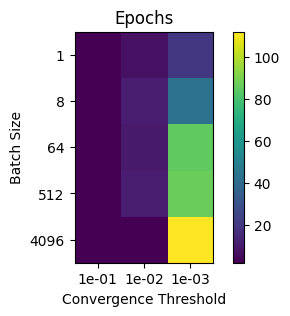

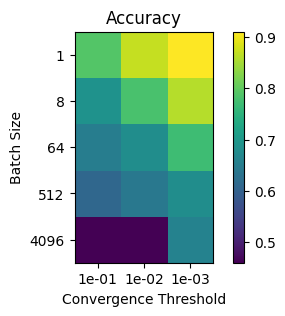

In [86]:
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)

BATCH_SIZE_ARR = [1, 8, 64, 512, 4096] # [TODO]: try different values
CONV_THRESHOLD_ARR = [1e-1, 1e-2, 1e-3]  # [TODO]: try different values

def generate_array():
    '''
        Runs the logistic regression model on different batch sizes and
        convergence thresholds to populate arrays for accuracy and number of epochs taken.
        @return:
            epoch_arr: 2D array of epochs taken, for each batch size and conv threshold
            acc_arr: 2D array of accuracies, for each batch size and conv threshold
    '''
    X_train, Y_train, X_test, Y_test = import_census(CENSUS_FILE_PATH)
    num_features = X_train.shape[1]

    # Add a bias
    X_train_b = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    X_test_b = np.append(X_test, np.ones((len(X_test), 1)), axis=1)

    # Initializes the accuracy and epoch arrays
    acc_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))
    epoch_arr = np.zeros((len(BATCH_SIZE_ARR), len(CONV_THRESHOLD_ARR)))

    ### Populate arrays ###
    for b in range(len(BATCH_SIZE_ARR)):
        for c in range(len(CONV_THRESHOLD_ARR)):
            model = LogisticRegression(n_features = num_features, 
                                       n_classes = 3, 
                                       batch_size = BATCH_SIZE_ARR[b],
                                       conv_threshold = CONV_THRESHOLD_ARR[c])
            epoch_arr[b][c] = model.train(X = X_train_b, Y = Y_train)
            acc_arr[b][c] = np.round(model.accuracy(X = X_test_b, Y = Y_test),2)
    return epoch_arr, acc_arr


def generate_heatmap(arr, name):
    '''
        Generates a matplotlib heatmap for an array
        convergence thresholds to populate arrays for accuracy and number of epochs taken.
        @param:
            arr: 2D array to generate heatmap of
            name: title of the plot (Hint: use plt.title)
        @return:
            None
    '''
    fig, ax = plt.subplots(figsize=(5,3))
    im = ax.imshow(arr, cmap = "viridis")

    ax.set_xticks(np.arange(len(CONV_THRESHOLD_ARR)))
    ax.set_yticks(np.arange(len(BATCH_SIZE_ARR)))

    ax.set_xticklabels([f'{c:.0e}' for c in CONV_THRESHOLD_ARR])
    ax.set_yticklabels(BATCH_SIZE_ARR)

    ax.set_xlabel('Convergence Threshold')
    ax.set_ylabel('Batch Size')
    ax.set_title(name)

    cbar = ax.figure.colorbar(im, ax=ax)

epoch_arr, acc_arr = generate_array()
generate_heatmap(epoch_arr, "Epochs")
generate_heatmap(acc_arr, "Accuracy")

**Solution:**

Q1: What tradeoffs exist between good accuracy and quick
    convergence?

A smaller convergence threshold (e.g., 1e-3) forces the model to train for more epochs before stopping, which results in more stable weight updates and higher accuracy. In contrast, a larger threshold (e.g., 1e-1) allows the model to stop earlier, saving computation time but often at the cost of underfitting and lower accuracy. Batch size also plays a critical role: smaller batches lead to noisier gradients and slower convergence, but they sometimes encourage better generalization. Larger batches, on the other hand, provide smoother gradient estimates and converge in fewer epochs, but they can plateau at lower accuracy. Thus, achieving higher accuracy typically requires smaller thresholds and moderate batch sizes, whereas quick convergence is achieved with larger thresholds and larger batches, though with weaker performance.

Q2: Why do you think the batch size led to the results you received?

From the heatmap, we can see that very small batch sizes (like 1 or 8) lead to higher accuracy, but they also take more epochs because the updates are noisy and slower to settle down. As the batch size grows (64, 512), training becomes faster and smoother, but accuracy starts to drop compared to the small batches. For the very large batch size (4096), the model converges very quickly, but accuracy is the worst, since the updates are too “smooth” and the model stops learning useful patterns. 

### **Question 2**
Try to run the model with `unnormalized_data.csv` instead of
`normalized_data.csv`. Report your findings when running the model
on the unnormalized data. In a few short sentences, explain what
normalizing the data does and why it affected your model's
performance.

When I ran the model with unnormalized data, the runtime was shorter (fewer epochs), but the accuracy was much lower compared to the normalized dataset. This happens because without normalization, features on very different scales distort gradient updates, leading the model to converge poorly. Normalization balances the feature scales, allowing gradient descent to train more effectively and achieve much higher accuracy.

<!-- **Solution:**  
I found out that the runtime is small(small spochs), however the accuracy is largely low compared to the origianl dataset. In the normalized data, continuous features like "age," "hours-per-week," "capital-gain"/"capital-loss,"...have been scaled down. The reason is that large-valued features (like capital-gain) produce much larger gradients compared to small features (like education-num), so the optimization heavily skews towards them. This leads to poor convergence and low accuracy. By normalizing the feature, all features are scaled to a similar range, so the model can learn weights fairly across all inputs, converging more stably and accurately. -->

### **Question 3**
Try the model with `normalized_data_nosens.csv`; in this data file,
we have removed the `race` and `sex` attributes. Report your
findings on the accuracy of your model on this dataset (averaging
over many random seeds here may be useful). Can we make any
conclusion based on these accuracy results about whether there is a
correlation between sex/race and education level? Why or why not?

**Solution:** 

When training on normalized_data_nosens.csv (with sex and race removed), the model’s accuracy was actually slightly higher than with the full dataset. This suggests that sex and race were not strong independent predictors once other features such as education, occupation, and hours worked were included. Their removal may have reduced noise or collinearity, allowing the model to generalize better. Therefore, we cannot conclude that sex and race have a strong correlation with education or other predictors just based on accuracy results. The increase in accuracy is more likely due to feature redundancy than a lack of real-world correlation.